In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [423]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [424]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36000 non-null  int64  
 1   Day_No              36000 non-null  int64  
 2   Course_ID           36000 non-null  int64  
 3   Course_Domain       36000 non-null  object 
 4   Course_Type         36000 non-null  object 
 5   Short_Promotion     36000 non-null  int64  
 6   Public_Holiday      36000 non-null  int64  
 7   Long_Promotion      36000 non-null  int64  
 8   Competition_Metric  35880 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [425]:
train_df.nunique()

ID                    512087
Day_No                   882
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3475
Competition_Metric       196
Sales                    544
dtype: int64

will drop Id column as it have all unique values

In [426]:
train_df.drop('ID',axis=1,inplace=True)


In [427]:
test_df.drop('ID',axis=1,inplace=True)

In [428]:
train_df.isna().sum()

Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

__we have missing values in competion metric__

In [429]:
train_df.describe()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [430]:
train_df.Course_Domain.value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

In [431]:
train_df.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

### EDA

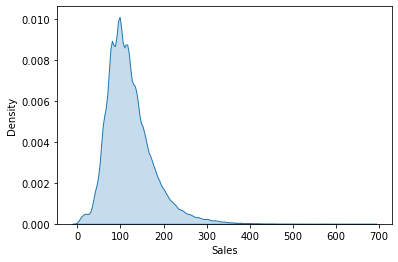

In [432]:
sns.kdeplot(train_df.Sales,shade=True)
plt.show()

In [433]:
print("Skewness= ", train_df.Sales.skew())
print("Kurtosis= ", train_df.Sales.kurt())

Skewness=  1.374769816079381
Kurtosis=  3.6095060518605546


We can see from the graph as well as from the stats that sales is possitively skewed and leptokurtic indicating heavy values on tail(outliers)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

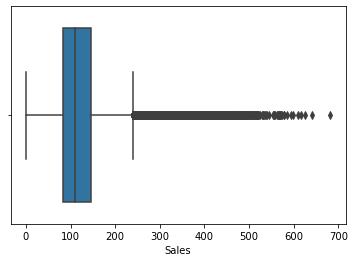

In [434]:
sns.boxplot(train_df.Sales)

We have some outliers in our target variable, but we will not remove these as thes are some genuine values and depicts some important insights in our data

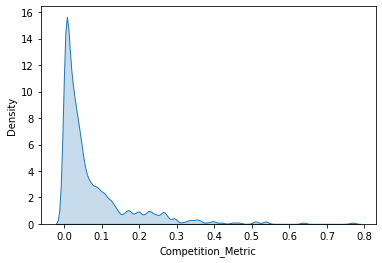

In [435]:
sns.kdeplot(train_df.Competition_Metric,shade=True)
plt.show()

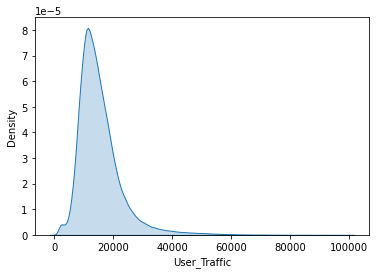

In [436]:
sns.kdeplot(train_df.User_Traffic,shade=True)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


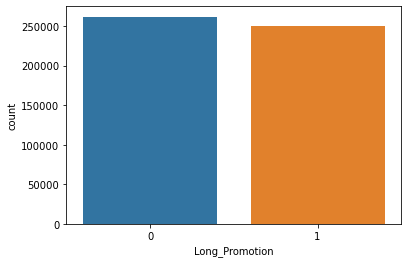

In [437]:
sns.countplot(train_df.Long_Promotion)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


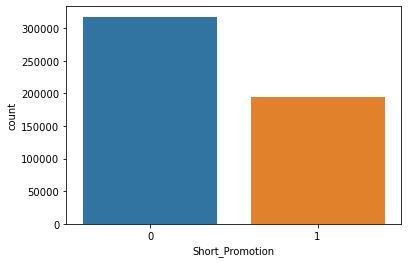

In [438]:
sns.countplot(train_df.Short_Promotion)
plt.show()

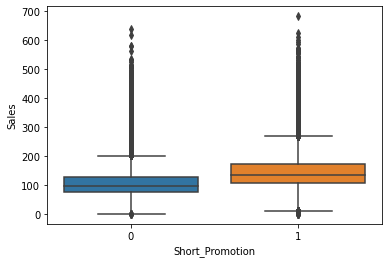

In [439]:
sns.boxplot(x='Short_Promotion',y='Sales'
            ,data=train_df)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


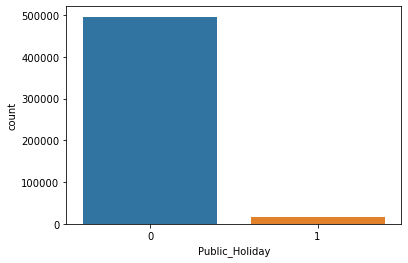

In [440]:
sns.countplot(train_df.Public_Holiday)
plt.show()

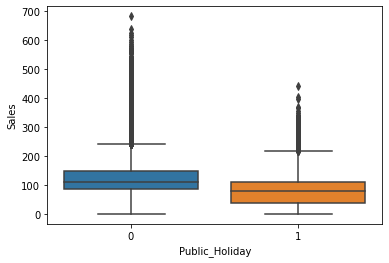

In [441]:
sns.boxplot(x='Public_Holiday',y='Sales'
            ,data=train_df)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


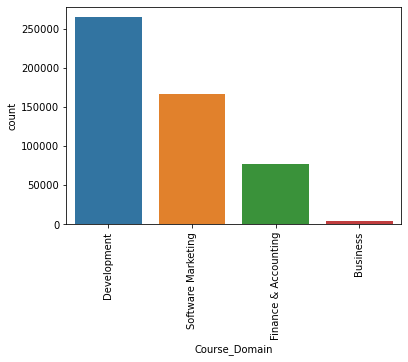

In [442]:
sns.countplot(train_df.Course_Domain)
plt.xticks(rotation=90)
plt.show()

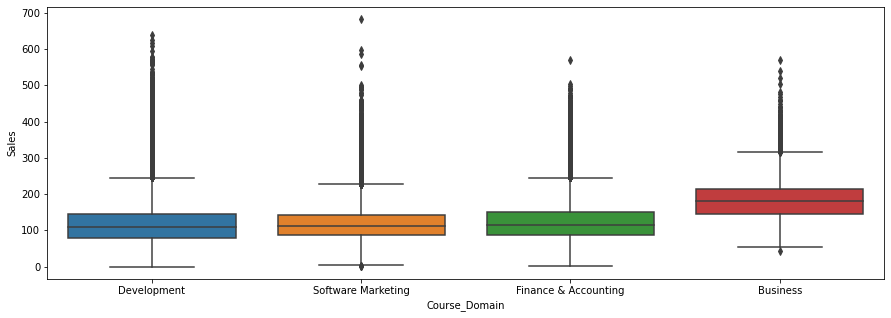

In [443]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Course_Domain',y='Sales'
            ,data=train_df)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


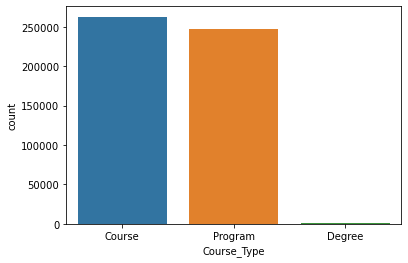

In [444]:
sns.countplot(train_df.Course_Type)
plt.show()

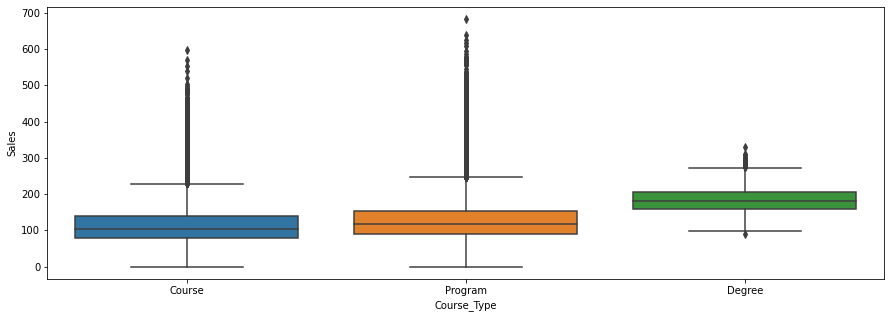

In [445]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Course_Type',y='Sales'
            ,data=train_df)
plt.show()

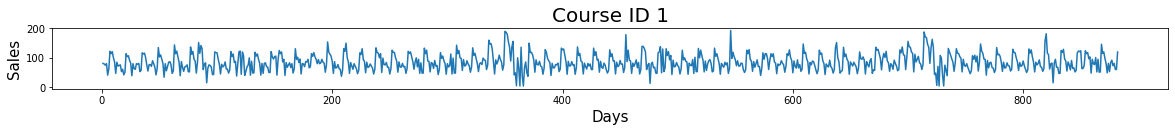

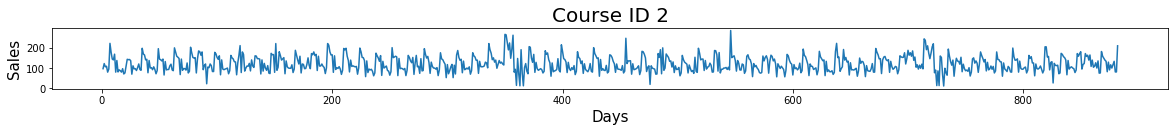

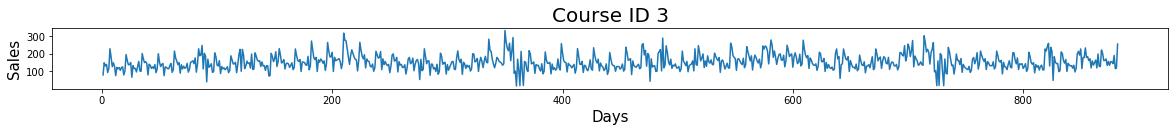

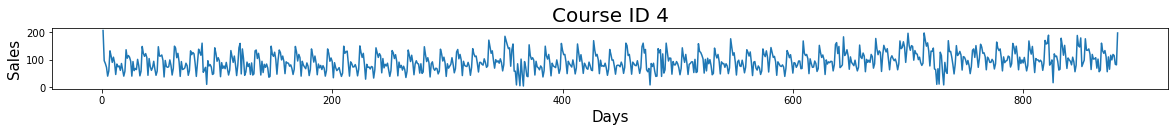

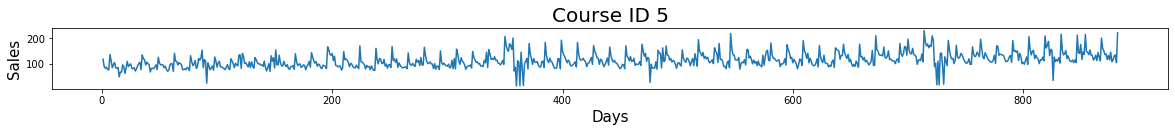

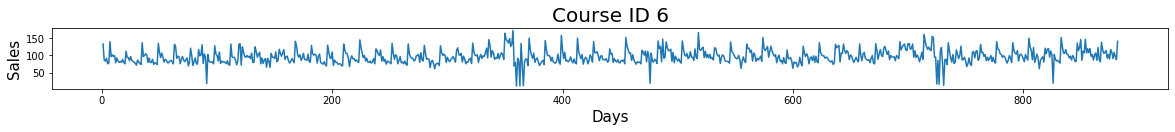

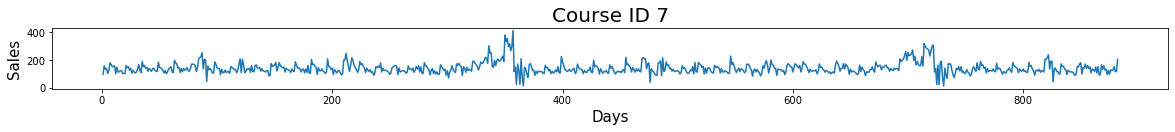

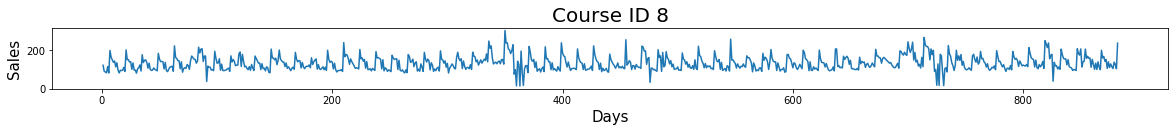

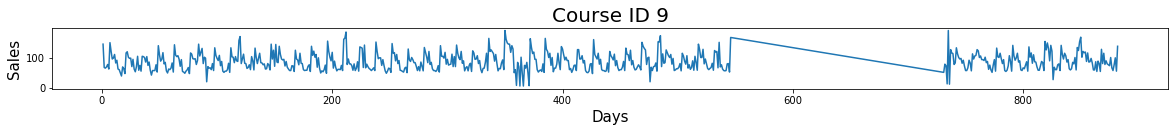

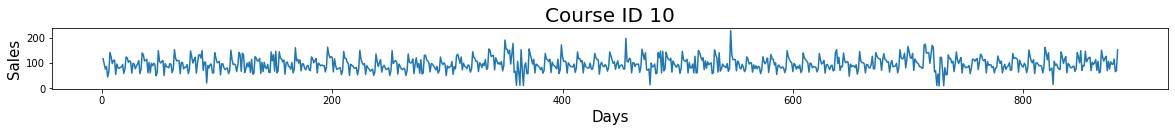

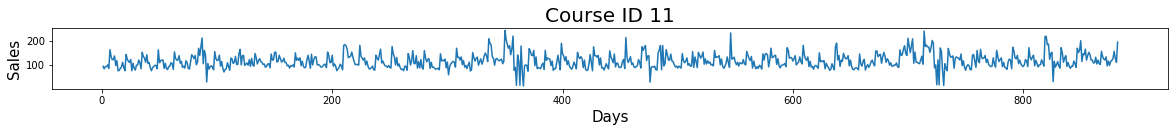

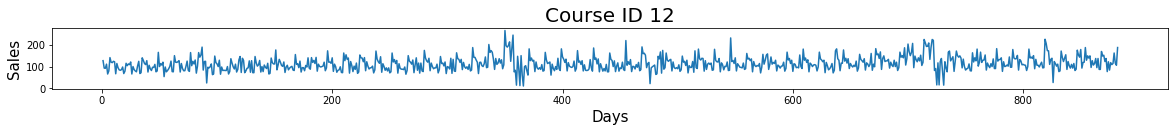

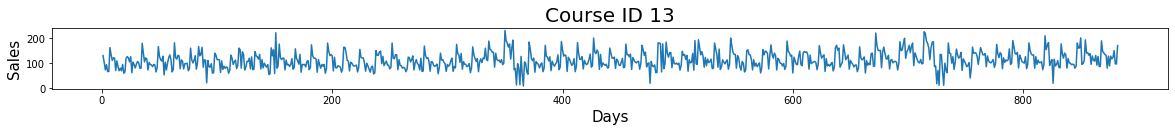

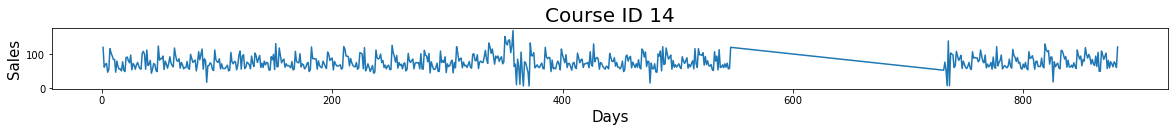

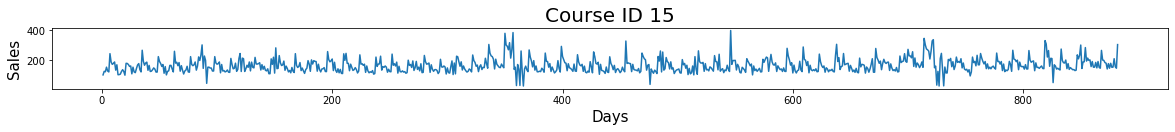

In [446]:
n_ids = 15
# plt.figure(figsize=(0,0))
for i in range(1,n_ids+1):
    plt.figure(figsize=(20,20))
    plt.subplot(n_ids,1,i)
    df = train_df[train_df.Course_ID==i]
    plt.plot(df.Day_No,df.Sales)
    plt.title(f'Course ID {i}',fontsize=20)
    plt.xlabel("Days",fontsize=15)
    plt.ylabel('Sales',fontsize=15)
plt.show()


there is some visible on some particular days

In [447]:
# train_df.Competition_Metric.fillna(train_df.Competition_Metric.median(),inplace=True)

In [448]:
missing_df = train_df[(train_df.Competition_Metric.isna())]

In [449]:
missing_df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
149014,1,176,Software Marketing,Course,0,1,0,12180,NaN,120
149015,2,176,Software Marketing,Course,0,0,0,18396,NaN,138
149016,3,176,Software Marketing,Course,0,0,0,18291,NaN,132
149017,4,176,Software Marketing,Course,0,0,0,19320,NaN,139
149018,5,176,Software Marketing,Course,0,0,0,11592,NaN,95


In [450]:
missing_df.describe()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.0,1764.000000,0.0,1764.000000
mean,441.500000,265.000000,0.380952,0.030612,0.0,13050.011905,NaN,107.255102
std,254.683505,89.025237,0.485759,0.172314,0.0,5537.401971,NaN,49.276416
min,1.000000,176.000000,0.000000,0.000000,0.0,1260.000000,NaN,6.000000
25%,221.000000,176.000000,0.000000,0.000000,0.0,8946.000000,NaN,72.000000
50%,441.500000,265.000000,0.000000,0.000000,0.0,11004.000000,NaN,95.000000
75%,662.000000,354.000000,1.000000,0.000000,0.0,17351.250000,NaN,137.000000
max,882.000000,354.000000,1.000000,1.000000,0.0,38787.000000,NaN,396.000000


In [451]:
missing_df.Course_Domain.value_counts()

Software Marketing    882
Development           882
Name: Course_Domain, dtype: int64

In [452]:
missing_df.Course_Type.value_counts()

Course     882
Program    882
Name: Course_Type, dtype: int64

In [453]:
missing_df.Course_ID.value_counts()

176    882
354    882
Name: Course_ID, dtype: int64

In [454]:
missing_df[missing_df.Course_ID==176].Course_Domain.value_counts()

Software Marketing    882
Name: Course_Domain, dtype: int64

In [455]:
missing_df[missing_df.Course_ID==354].Course_Domain.value_counts()

Development    882
Name: Course_Domain, dtype: int64

We have null values for all the days of the data that we have with us for 2 courses i.e. __176__ & __354__.
Also the Competion metric is used to __quantify how often the ads for the course is being targeted to the user when the search a keyword.__ So we are not going to impute as it is not looking like some human error and we will keep the properties of data as it is and will used Tree based algorithm.


In [456]:
train_df.isna().sum()

Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [457]:
train_df.dtypes=='object'

Day_No                False
Course_ID             False
Course_Domain          True
Course_Type            True
Short_Promotion       False
Public_Holiday        False
Long_Promotion        False
User_Traffic          False
Competition_Metric    False
Sales                 False
dtype: bool

In [458]:
num_cols = train_df.columns[train_df.dtypes!='object']
num_cols

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

In [459]:
corr = train_df.corr()

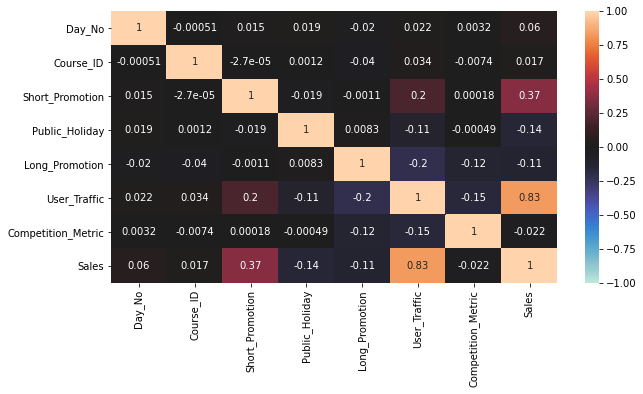

In [460]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,center=0,vmin=-1,vmax=1)
plt.show()

In [461]:
pd.DataFrame(abs(train_df.corr().unstack()).sort_values().drop_duplicates())

0
Short_Promotion    Course_ID           0.000027
Competition_Metric Short_Promotion     0.000182
                   Public_Holiday      0.000491
Course_ID          Day_No              0.000506
Long_Promotion     Short_Promotion     0.001149
Public_Holiday     Course_ID           0.001242
Day_No             Competition_Metric  0.003229
Course_ID          Competition_Metric  0.007385
Long_Promotion     Public_Holiday      0.008319
Short_Promotion    Day_No              0.014645
Sales              Course_ID           0.016894
Short_Promotion    Public_Holiday      0.018770
Day_No             Public_Holiday      0.019112
Long_Promotion     Day_No              0.020204
Day_No             User_Traffic        0.021511
Sales              Competition_Metric  0.022085
Course_ID          User_Traffic        0.033520
Long_Promotion     Course_ID           0.039605
Sales              Day_No              0.060012
Public_Holiday     User_Traffic        0.108305
Sales              Long_Promotion      0.109455
Competition_Metric Long_Promotion      0.119382
Public_Holiday     Sales               0.135052
User_Traffic       Competition_Metric  0.148775
                   Short_Promotion     0.198785
Long_Promotion     User_Traffic        0.204289
Sales              Short_Promotion     0.367762
User_Traffic       Sales               0.829741
Day_No             Day_No              1.000000

__User Traffic and sales has very high correlation so will drop user_traffic so it can very well explain the target variable but we don't have this variable in test data so we will remove this for now. Later we can try to predict the User_traffic in test data and then use that for sales prediction.__

In [462]:
train_df.drop('User_Traffic',axis=1,inplace=True)

### Feature Engineering

We have seen some patterns in the sales on different days, so we will now try to get the day number according to week to see if there is any pattern observed for weekdays or weekends

__As the data is from 2 and more years span so we are assuming the Day_no as day number in a year starting from Jan 1, 2019.__

In [463]:
import datetime as date_obj
start_date = date_obj.datetime(2018,12,31)

In [464]:
train_df['date']=train_df.Day_No.apply(lambda x: (start_date+ date_obj.timedelta(x)))

In [465]:
train_df['day']=train_df['date'].apply(lambda x:x.day)

In [466]:
train_df['month']=train_df['date'].apply(lambda x:x.month)

In [467]:
train_df['year']=train_df['date'].apply(lambda x:x.year)

In [468]:
train_df['weekday']=train_df['date'].apply(lambda x:x.weekday())

In [469]:
train_df['is_week_end']=train_df['date'].apply(lambda x:1 if x.weekday()>=5 else 0)

In [470]:
train_df.drop('date',axis=1,inplace=True)

In [471]:
train_df.head(10)

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,day,month,year,weekday,is_week_end
0,1,1,Development,Course,0,1,1,0.007,81,1,1,2019,1,0
1,2,1,Development,Course,0,0,1,0.007,79,2,1,2019,2,0
2,3,1,Development,Course,0,0,1,0.007,75,3,1,2019,3,0
3,4,1,Development,Course,0,0,1,0.007,80,4,1,2019,4,0
4,5,1,Development,Course,0,0,1,0.007,41,5,1,2019,5,1
5,6,1,Development,Course,0,0,1,0.007,62,6,1,2019,6,1
6,7,1,Development,Course,1,0,1,0.007,122,7,1,2019,0,0
7,8,1,Development,Course,1,0,1,0.007,114,8,1,2019,1,0
8,9,1,Development,Course,1,0,1,0.007,121,9,1,2019,2,0
9,10,1,Development,Course,1,0,1,0.007,100,10,1,2019,3,0


In [472]:
test_df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,1,Development,Course,1,0,1,0.007
1,884,1,Development,Course,1,0,1,0.007
2,885,1,Development,Course,1,0,1,0.007
3,886,1,Development,Course,1,0,1,0.007
4,887,1,Development,Course,0,0,1,0.007


In [473]:
test_df['date']=test_df.Day_No.apply(lambda x: (start_date+ date_obj.timedelta(x)))

In [474]:
test_df['day']=test_df['date'].apply(lambda x:x.day)

In [475]:
test_df['month']=test_df['date'].apply(lambda x:x.month)

In [476]:
test_df['year']=test_df['date'].apply(lambda x:x.year)

In [477]:
test_df['weekday']=test_df['date'].apply(lambda x:x.weekday())

In [478]:
test_df['is_week_end']=test_df['date'].apply(lambda x:1 if x.weekday()>=5 else 0)

In [479]:
test_df.drop('date',axis=1,inplace=True)

In [480]:
test_df.head(10)

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,day,month,year,weekday,is_week_end
0,883,1,Development,Course,1,0,1,0.007,1,6,2021,1,0
1,884,1,Development,Course,1,0,1,0.007,2,6,2021,2,0
2,885,1,Development,Course,1,0,1,0.007,3,6,2021,3,0
3,886,1,Development,Course,1,0,1,0.007,4,6,2021,4,0
4,887,1,Development,Course,0,0,1,0.007,5,6,2021,5,1
5,888,1,Development,Course,0,0,1,0.007,6,6,2021,6,1
6,889,1,Development,Course,0,0,1,0.007,7,6,2021,0,0
7,890,1,Development,Course,0,0,1,0.007,8,6,2021,1,0
8,891,1,Development,Course,0,0,1,0.007,9,6,2021,2,0
9,892,1,Development,Course,0,0,1,0.007,10,6,2021,3,0


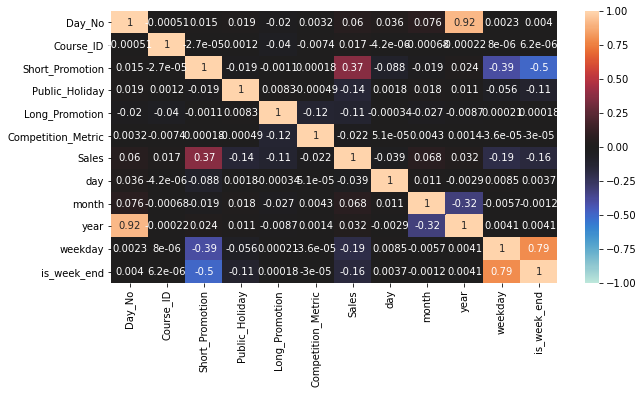

In [481]:
corr = train_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,center=0,vmin=-1,vmax=1)
plt.show()

In [482]:
train_df.drop('Day_No',inplace=True,axis=1)

In [483]:
test_df.drop('Day_No',inplace=True,axis=1)

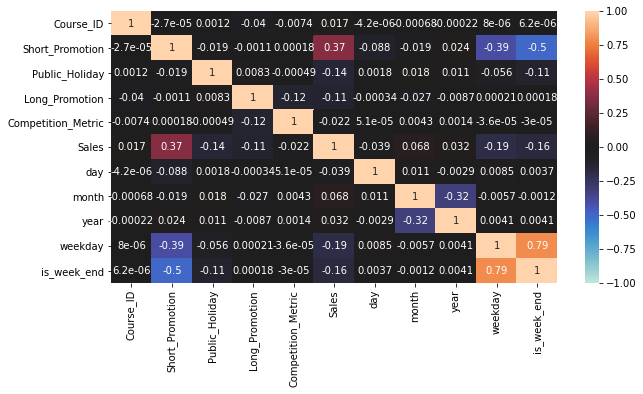

In [484]:
corr = train_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,center=0,vmin=-1,vmax=1)
plt.show()

### Model Building

In [485]:
train_df.columns.dtype=='object'

True

In [486]:
cat_col = train_df.columns[train_df.dtypes=='object']
cat_col

Index(['Course_Domain', 'Course_Type'], dtype='object')

In [487]:
train_df = pd.concat([train_df,pd.get_dummies(train_df[cat_col],drop_first=True)],axis=1)

In [488]:
train_df.drop(cat_col,inplace=True,axis=1)

In [489]:
test_df = pd.concat([test_df,pd.get_dummies(test_df[cat_col],drop_first=True)],axis=1)

In [490]:
test_df.drop(cat_col,inplace=True,axis=1)

In [491]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Course_ID                           512087 non-null  int64  
 1   Short_Promotion                     512087 non-null  int64  
 2   Public_Holiday                      512087 non-null  int64  
 3   Long_Promotion                      512087 non-null  int64  
 4   Competition_Metric                  510323 non-null  float64
 5   Sales                               512087 non-null  int64  
 6   day                                 512087 non-null  int64  
 7   month                               512087 non-null  int64  
 8   year                                512087 non-null  int64  
 9   weekday                             512087 non-null  int64  
 10  is_week_end                         512087 non-null  int64  
 11  Course_Domain_Development 

In [492]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Course_ID                           36000 non-null  int64  
 1   Short_Promotion                     36000 non-null  int64  
 2   Public_Holiday                      36000 non-null  int64  
 3   Long_Promotion                      36000 non-null  int64  
 4   Competition_Metric                  35880 non-null  float64
 5   day                                 36000 non-null  int64  
 6   month                               36000 non-null  int64  
 7   year                                36000 non-null  int64  
 8   weekday                             36000 non-null  int64  
 9   is_week_end                         36000 non-null  int64  
 10  Course_Domain_Development           36000 non-null  uint8  
 11  Course_Domain_Finance & Accounting  36000

In [493]:
X = train_df.drop('Sales',axis=1)
Y = train_df.Sales

In [494]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=11)

In [495]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [496]:
model= XGBRegressor( random_state = 10)

In [497]:
p={
    'n_estimators':[200,250],
    'max_depth':[10,15]
}

In [498]:
cv = GridSearchCV(model,param_grid=p,n_jobs=-1,cv=3)

In [499]:
cv.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=10,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [500]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error

In [501]:
cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [502]:
model = cv.best_estimator_

In [503]:
print('R2 score for train data : ',model.score(x_train,y_train))

R2 score for train data :  0.9783939828925797


In [504]:
print('R2 score for test data : ',model.score(x_test,y_test))

R2 score for test data :  0.9445990119707799


In [505]:
y_test_pred = model.predict(x_test)

In [506]:
r2_score(y_test,y_test_pred)
print('R2 score for test data : ',r2_score(y_test,y_test_pred))

R2 score for test data :  0.9445990119707799


In [507]:
print('RMSE for test data data : ',mean_squared_error(y_test,y_test_pred)**0.5)

RMSE for test data data :  12.74621403478472


In [508]:
def rmsle1000(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000

In [509]:
rmsle1000(y_test,y_test_pred)

<ipython-input-508-e9ff9a488ff0>:2: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


136.35298782649616

In [510]:
ids = pd.read_csv('test.csv').ID

In [511]:
final_output = pd.DataFrame({'ID':ids,'Sales':model.predict(test_df)})
final_output.to_csv('output.csv', index=False)
final_output.head()

,ID,Sales
0,883,122.794273
1,884,117.000916
2,885,106.548462
3,886,92.820564
4,887,58.059975


### we have one stable model so we will try to overfit and then penalise it

In [512]:
model_2 = XGBRegressor(random_state = 10,n_estimators=270,max_depth=12,reg_alpha=110)

In [513]:
model_2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=270, n_jobs=8, num_parallel_tree=1, random_state=10,
             reg_alpha=110, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [514]:
print('R2 score for train data : ',model_2.score(x_train,y_train))

R2 score for train data :  0.9764604334761454


In [515]:
print('R2 score for test data : ',model_2.score(x_test,y_test))

R2 score for test data :  0.9449414987159629


In [516]:
y_test_pred = model_2.predict(x_test)

In [517]:
r2_score(y_test,y_test_pred)
print('R2 score for test data : ',r2_score(y_test,y_test_pred))

R2 score for test data :  0.9449414987159629


In [518]:
print('RMSE for test data data : ',mean_squared_error(y_test,y_test_pred)**0.5)

RMSE for test data data :  12.706754657379163


In [519]:
def rmsle1000(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000

In [520]:
rmsle1000(y_test,y_test_pred)

<ipython-input-519-e9ff9a488ff0>:2: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2))) *1000


131.66577327391485

In [521]:
final_output = pd.DataFrame({'ID':ids,'Sales':model_2.predict(test_df)})
final_output.to_csv('output_2.csv', index=False)
final_output.head()

,ID,Sales
0,883,118.614372
1,884,127.513161
2,885,113.988777
3,886,107.627846
4,887,52.453011
